<a href="https://colab.research.google.com/github/BelkisCeri/ML_Project-Titanic/blob/main/Titanic_project_ipynb_4_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Project with Sikitlearn and Python: Titanic 
## The problem the we focus on is 
 What sorts of people (e.g. female, older, etc) are more likely to survive?

Do Exploratory Data Analysis (EDA)?
Show graphs, missing data, data issues?
Build models and compare models based on evaluation metrics?
Run the test data to get predictions.
1. Understanding the Data
2. Data pre-processing:
First we need to understand and process the data to figure out which ML model we will implement on.
During the data processing, we ned to clean the missing values.
3. Data Analysing:
4. Train/test Split:
Then split the data into train and test sets.
5. ML Model
Summarize the model, We are looking for survived and not survived people, so this is a binary calssification case, so we will use logistic regression model.   We will predict the whther the person survived or not.
6. Evaluation:

STEP-1:  First, let's start by dowloading the Python libraries.

4. Train/test Split: 

# STEP-1. Understanding the Data

In [ ]:
# STEP- 1.1 let's dowload the libraries that we will use 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
# %matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# STEP-2 Data Collection and Pre-processing:

In [ ]:
# Step_2.1 Load the file from csv ro Pandas as a data frame

df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
combine = [df, test_df]

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#STEP-2.2 let's see how many columsn and row we have.
df.shape
# we have 12 features columsn and 1 target colums which called 'survived'. Furheermore, we have 891 passengers.

(891, 12)

In [ ]:
# #STEP-2.3 for more detail infor about the data set, 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# #STEP-2.4 time to read the datas to see the missings,  NaN (Not a number values) and NULL (missing) values
# use isnull function to see howmany  missing values we have all together.
df.isnull()
# True means missing values.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#All right, let find the sum NULLs row by row. 
df.isnull().sum()
# we have 3 fetures (age, cabin, embarked) have misding values.
# we have 891 passengers and at most 687 (cabin) of them have missing values. 
#Hence, ther eis only 891-687 = 204 passengers have all the values in.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Step-2.5 We need to handle the missing values, NULLs
# First let's get rid of the the NULL values in Cabin columnbecaue almost 90% of the datas are missing.
#I will call the dropped data frame  as df again
df = df.drop(columns = 'Cabin' ,  axis =1)

In [ ]:
# Then  I will replace the misisng valeus in Age colum as the mean of ages that the passengers have.
# Step 2.6. replace the missings with meam in the age colums.
# I wil not replace the current values of the non-null columns, so I pur ' inpalace = True ')
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [ ]:
# Step 2.7.1 Now, I want to replace the 2 mising values that the embarked colum have instead as the mode loading port.
#First, find the most frequently repated port in embarked column.
print(df['Embarked'].mode())
# the S is Southampton Port is the the most frequently seen in the df.

0    S
dtype: object


In [ ]:
# # Step 2.7.2 
df['Embarked'].mode()[0]

'S'

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()
# Yes we replace all the missing values now.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# STEP-3 Data Analysing


In [ ]:
# Step-3.1 We will do some data anlysis , statistical part besides graphing the data to undestand the datas better.
# find the decriptive statistics of the data
df.describe()
# Now this result is not very helpful because we have several categorical values(Pclass, Survived, Parch, tucket) which can not be applied satistical measures such as mean, median, etc.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Step-3.2 LEt's find the how many people are survived(1) and not survived(0)
df['Survived'].value_counts()

# number of people who survived is more than not survived ones. *this is the insighed that we gained from this query)

0    549
1    342
Name: Survived, dtype: int64

## Data Visulization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


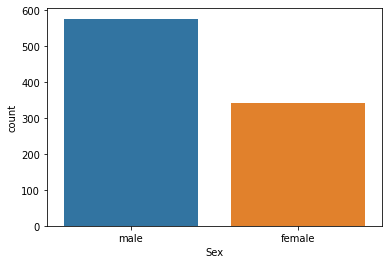

In [ ]:
# Step-3.3. We will do Data vissulizations now.
# will graph a count plot for Survived column
sns.countplot('Survived', data = df)
sns.countplot(x = 'Sex', data = df)

In [ ]:
# LEt's find the how many people are male(1) and feamle(0)
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

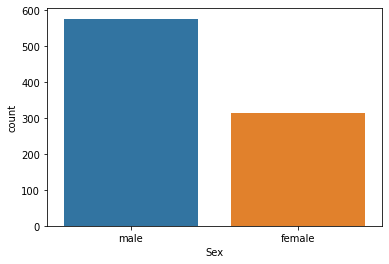

In [ ]:
# will graph a count plot for Sex column
sns.countplot(x ='Sex', data = df)


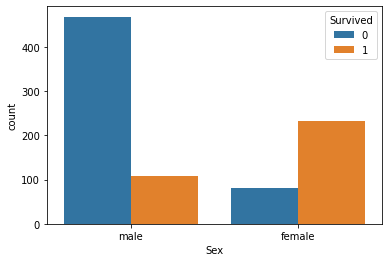

In [ ]:
# Step-3.4. Now to get more info, we will compare the survived people based on gender.
# In other words, howmany of the survivers are female?
sns.countplot(x = 'Sex', hue ='Survived', data = df)

# Based on this graph we can get an insight is that most of the survivers are females. In other word, females heve more pirioty to survive.

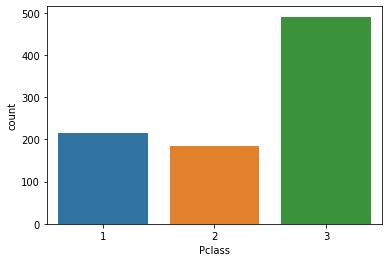

In [ ]:
# Step-3.5. LEt's do our visulization more complicated. Compare the survivers based on gender and Pclass
# first, draw the Plass graph, (1 represent 1st, 2 = 2nd, 3 = 3rd class)
sns.countplot(x = 'Pclass',  data = df)
# Then, combine all 3 categpries into 1 graph


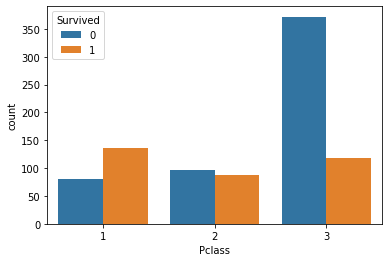

In [ ]:
sns.countplot(x = 'Pclass', hue ='Survived', data = df)

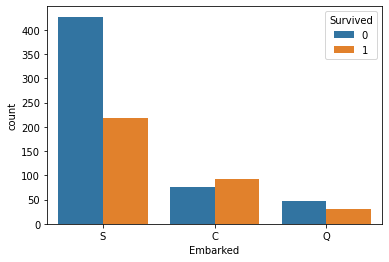

In [ ]:
sns.countplot(x="Embarked", hue="Survived", data = df)

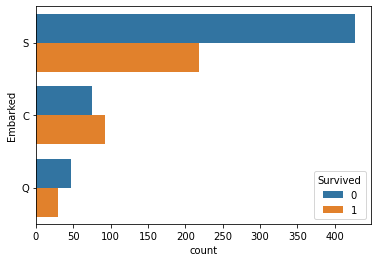

In [ ]:
# Extra information: If I would like to graph the values horizontally I slould use y instead of x. FOr instance, see blove.
sns.countplot(y="Embarked", hue="Survived", data=df)

Encoding the categorical values into numerical values,
 such as Male = 0 Female =1 ect. 
 Embarked SC

In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#  Step-3.6.
df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)
df.head()
# We encoded the strings as numerical values.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


## Separating the columns (feature (x) vs target (y))

In [ ]:
#  Step-3.7. Let's seperate the target column (Survived)becasue we want to know which passenger were survived. 
# x = 1 represent the columns, x = 0 represents the rows.

X = df.drop(columns = ["PassengerId", 'Name', 'Ticket'], axis = 1)
Y = df['Survived']


In [ ]:
print(X)

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.000000      1      0   7.2500         0
1           1       1    1  38.000000      1      0  71.2833         1
2           1       3    1  26.000000      0      0   7.9250         0
3           1       1    1  35.000000      1      0  53.1000         0
4           0       3    0  35.000000      0      0   8.0500         0
..        ...     ...  ...        ...    ...    ...      ...       ...
886         0       2    0  27.000000      0      0  13.0000         0
887         1       1    1  19.000000      0      0  30.0000         0
888         0       3    1  29.699118      1      2  23.4500         0
889         1       1    0  26.000000      0      0  30.0000         1
890         0       3    0  32.000000      0      0   7.7500         2

[891 rows x 8 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# STEP-4 Spliting the Test and Train data


In [ ]:
# STEP 4.1   0.2 represent the 20% of the data does to X- test data, the rest of them will be remain in the X-train data set. 
#Because, we usually use 10 or 20 percent of the data as a train data set in ML. 
# Also, random state represet the 2 dimentional array.
# I used train_test_slplit function to split the data sets onto two sperate sets.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

#this means . 712 and 179 partcipant goes to X_train and X_test, repectively.

(891, 8) (712, 8) (179, 8)


### Model Training

In [ ]:
# STEP 4.2 Time to feed  this trainin data with the ML logiztic regression model, so it can be learned from data.
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

# STEP-5 Evaluation

## Accuracy Score

In [ ]:
# We wull look at the accuracy score to evaluate the model.
# Now, we will ask our model to predict the y value.
# Step-5.1 Accuracy level of trained data.
X_train_prediction = model.predict(X_train)
print(X_train_prediction)



# 1 is the survived and 0 is not survived individuals. 

[0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 

In [ ]:
# Step-6.2 Now we need to compare the X_train values by Y_train value(original)
# The accuracy score is how many prediction that our model is making.
training_data_accuracy = accuracy_score (Y_train, X_train_prediction)
print("Accuracy score of training data : ", training_data_accuracy)

Accuracy score of training data :  1.0


In [ ]:
# Step-6.3 Now let's check the test data acciracy score.
X_test_prediction = model.predict(X_test)
print(X_test_prediction)


[1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0
 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0]


In [ ]:
# Step-6.4 Now we need to compare the X_test values by Y_test value(test)
# The accuracy score is how many prediction that our model is making.
test_data_accuracy = accuracy_score (Y_test, X_test_prediction)
print("Accuracy score of training data :", test_data_accuracy)


Accuracy score of training data : 1.0


**Accuracy score of traninig and test data = 100% Why?**::